##**Importing Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay

#**Loading the datasets**

In [5]:
iris=load_iris()
X=iris.data[:100,:2]
y=iris.target[:100]


In [6]:
import pandas as pd
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#*Splitting Data*

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

##**Tranning the model**

In [9]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [11]:
#Making predictions

y_pred=model.predict(X_test)
print(y_test)
print(y_pred)

[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]


In [12]:
#Evaluating the model

accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 1.0


#**Visualizing the decision boundary**

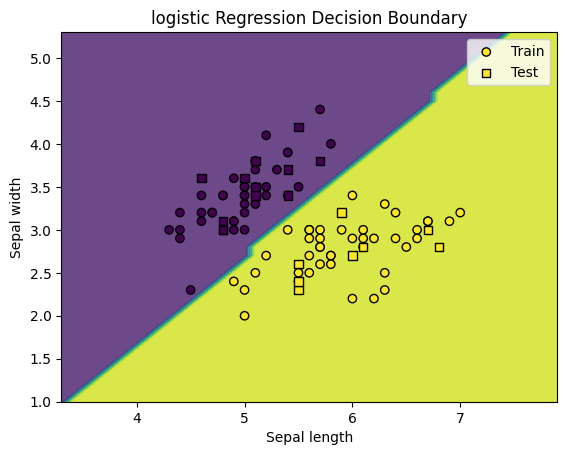

In [13]:
x_min, x_max = X[:,0].min() -1, X[:,0].max() +1
y_min, y_max = X[:,1].min() -1, X[:,1].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class for each point in the meshgrid

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolors='k',marker='o',label='Train')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolors='k',marker='s',label='Test')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('logistic Regression Decision Boundary')
plt.legend()
plt.show()

In [14]:
#inferencing on tesst data

new_data=np.array([[9.1,3.5]])
predicted_class=model.predict(new_data)
class_name=iris.target_names[predicted_class[0]]
print(f'Predicted class: {class_name} ({predicted_class[0]})')

Predicted class: versicolor (1)


#**Confusion Matrix**

In [15]:
cm=confusion_matrix(y_test,y_pred)


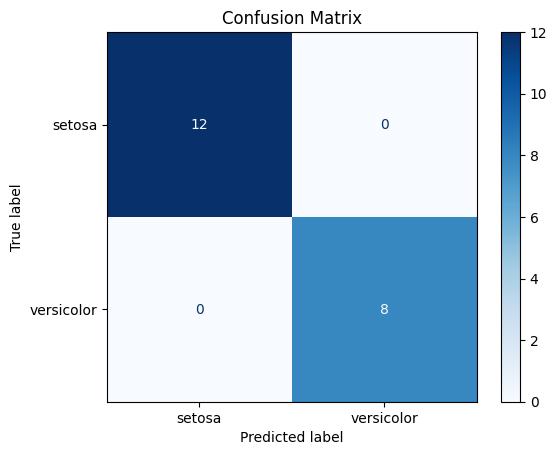

In [17]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=iris.target_names[:2])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()